# Milestone 2 Phase 1

### Data Set Information:

Sebuah perusahaan yang bergerak di bidang Big Data dan Data Science ingin merekrut ilmuwan data di antara orang-orang yang berhasil lulus beberapa kursus yang diadakan oleh perusahaan. Banyak orang mendaftar untuk pelatihan mereka. Perusahaan ingin mengetahui kandidat mana yang benar-benar ingin bekerja untuk perusahaan setelah pelatihan atau mencari pekerjaan baru karena membantu mengurangi biaya dan waktu serta kualitas pelatihan atau perencanaan kursus dan kategorisasi kandidat. Informasi terkait *demographics*, *education*, *experience* dari pendaftaran dan pendaftaran kandidat.

Dataset ini dirancang untuk memahami faktor-faktor yang menyebabkan seseorang meninggalkan pekerjaan saat ini untuk penelitian SDM juga. Dengan model yang menggunakan kredensial, demografi, data pengalaman saat ini, Anda akan memprediksi probabilitas seorang kandidat untuk mencari pekerjaan baru atau akan bekerja untuk perusahaan, serta menafsirkan faktor-faktor yang memengaruhi keputusan karyawan.

Source: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists?select=aug_train.csv

### Import Library

In [1]:
# for basic mathematics operation 
import numpy as np

# for dataframe manipulations
import pandas as pd

# for Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# to make this notebook's output identical at every run
np.random.seed(42)

### Data Loading

In [2]:
# Load the dataset
df = pd.read_csv("aug_train.csv")

In [3]:
# Look at the first 5 rows the dataset
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


#### Attribute Information

- enrollee_id : ID untuk kandidat
- city: Kode kota
- city_ development _index : Indeks pembangunan kota (berskala)
- gender: Jenis kelamin kandidat
- relevent_experience: Pengalaman kandidat yang relevan
- enrolled_university: Jenis program Universitas yang terdaftar jika ada
- education_level: Tingkat pendidikan kandidat
- major_discipline : Pendidikan disiplin utama kandidat
- experience: Kandidat total pengalaman dalam tahun
- company_size: Jumlah karyawan di perusahaan pemberi kerja saat ini
- company_type : Jenis majikan saat ini
- lastnewjob: Perbedaan tahun antara pekerjaan sebelumnya dan pekerjaan saat ini
- training_hours: jam pelatihan
- target: **0** – Tidak mencari perubahan pekerjaan, **1** – Mencari perubahan pekerjaan

In [4]:
# Showing info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
# Get descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [6]:
# Look at the shape of the dataset (# rows, # columns)
print("Shape of the dataset :", df.shape)

Shape of the dataset : (19158, 14)


### Data Cleaning

#### Missing Value & Duplicate
Mengecek apakah ada missing value atau data yang duplikat pada dataset

In [7]:
# Missing Value
print('Missing value :','\n', df.isnull().sum())
print("-----------------------------------------")
# Duplicated Data
print('Duplicated data : ', df.duplicated().sum())

Missing value : 
 enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64
-----------------------------------------
Duplicated data :  0


*Missing Value* dalam data ini bukanlah nilai yang mudah untuk diperhitungkan, karena jika salah dalam menginput data yang hilang mungkin bisa terjadi korelasi yang tidak ada, dan secara umum, logika data mungkin hilang. Oleh karena itu, EDA akan dilakukan pada semua data yang tersedia, dan untuk pemodelan, semua baris dengan nilai yang hilang akan dihapus.

#### Drop Unused Columns

In [8]:
# Menghilangkan kolom yang tidak penting
df.drop(['enrollee_id'],axis=1,inplace=True)

Kami menghapus atribut yang tidak digunakan.

### Exploratory Data Analysis (EDA)
Sebuah perusahaan yang bergerak di bidang Big Data dan Data Science ingin merekrut ilmuwan data di antara orang-orang yang berhasil lulus beberapa kursus yang diadakan oleh perusahaan. Banyak orang mendaftar untuk pelatihan mereka. Mari kita cari tau tipe orang seperti apa yang akan keluar dari perusahaan. Sebelum itu mari kita lihat dataset dulu.

In [9]:
data = df.copy()

In [10]:
data.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


**Mari kita melihat eksplorasi datanya**

### 1.  City Development Index
Fitur ini memiliki indeks perkembangan kota.

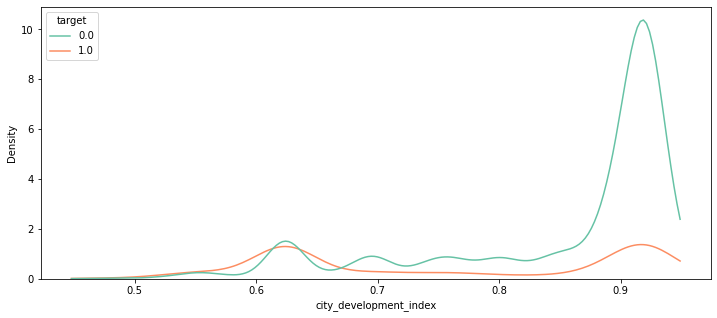

In [11]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=data, x="city_development_index", hue="target",cut = 0,palette='Set2');

Di sini kita dapat melihat bahwa orang-orang yang tinggal di kota-kota maju memiliki kemungkinan yang lebih kecil untuk berpindah pekerjaan.

### 2. Gender
Fitur ini memberi tahu jenis kelamin dari kandidat.

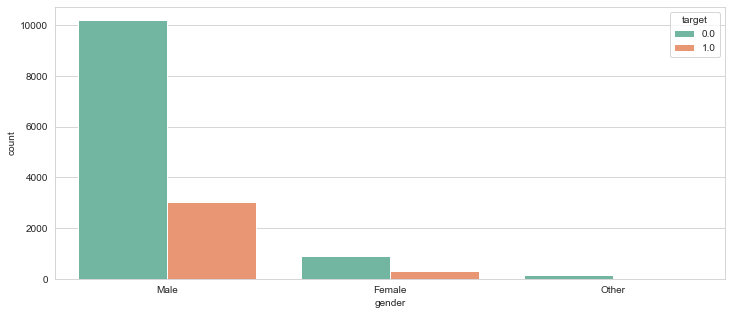

In [12]:
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'gender',hue='target',data=data,palette='Set2');

Karena dari dataset diatas kita melihat adanya *NAN* maka kita akan mengisi *NAN*-nya dan akan menghilangkan *Other* karena dapat dilihat dari grafik diatas jika dihilangkan tidak akan berpengaruh banyak pada dataset berikut ini.

In [13]:
data["gender"].fillna("Male", inplace = True)


g = pd.get_dummies(data['gender'])
data.drop(['gender'],axis=1,inplace=True)
data = pd.concat([data,g],axis=1)


data.drop(['Other'],axis=1,inplace=True) 

Dapat kita lihat bahwa dari *Pria* banyak sekali yang keinginan untuk tidak pindah dari pekerjannya itu sangat banyak lebih dari 10.000 sedangkan yang ingin pindah lumayan banyak sekitar 3000-an. Sedangkan dengan *Wanita* lebih sedikit dari *pria* seperti yang tidak ingin pindah kurang lebih 1000, sedangkan *wanita* yang ingin pindah hanya sedikit kurang dari 500. Maka dari itu bisa kita simpulkan bahwa jenis kelamin yang lebih mempunyai kemauan untuk pindah dan tidak ialah *Pria*

### 3. Relevant Experience
Fitur ini memberi tahu apakah kandidat memiliki pengalaman yang relevan atau tidak.

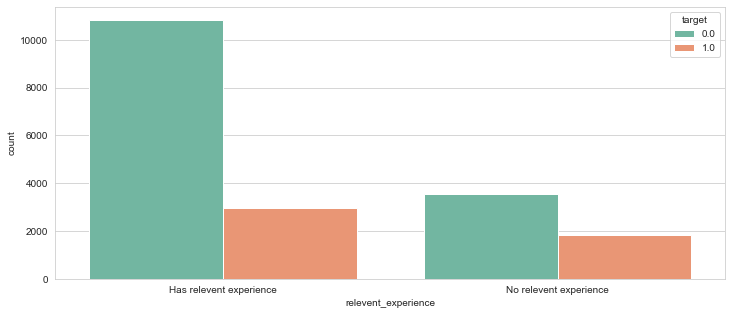

In [14]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'relevent_experience',hue='target',data=data,palette='Set2');

Sebelum itu, kita akan melakukan penghapusan pada data seseorang yang tidak memiliki pengalaman yang relevan untuk pekerjaan data science ini untuk mencari yang terbaik dari yang terbaik dari kandidat.

In [15]:
rel = pd.get_dummies(data['relevent_experience'])
data.drop(['relevent_experience'],axis=1,inplace=True)
data = pd.concat([data,rel],axis=1)


data.drop(['No relevent experience'],axis=1,inplace=True) 

Dapat kita simpulkan dari barplot diatas bahwa, orang yang ingin memiliki pekerjaan baru dengan pengalaman yang relevan lebih banyak ketimbang orang yang memiliki background yang tidak relevan.

### 4. Enrolled University
Fitur ini menunjukan jenis program universitas yang terdaftar.

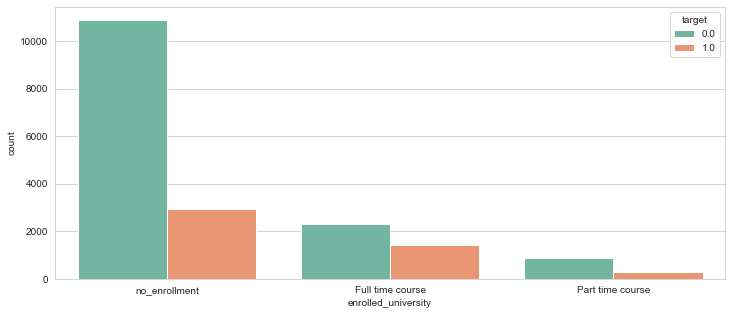

In [16]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'enrolled_university',hue='target',data=data,palette='Set2');

Karena dari dataset diatas kita melihat adanya *NAN* maka kita akan mengisi *NAN*-nya dan akan menghilangkan *Other* karena dapat dilihat dari grafik diatas jika dihilangkan tidak akan berpengaruh banyak pada dataset berikut ini.

In [17]:
data["enrolled_university"].fillna("no_enrollment", inplace = True)


e = pd.get_dummies(data['enrolled_university'])
data.drop(['enrolled_university'],axis=1,inplace=True)
data = pd.concat([data,e],axis=1)


data.drop(['Part time course'],axis=1,inplace=True) 

Kita dapat melihat bahwa orang yang berminat dalam mendaftarkan diri untuk pekerjaan apapun ialah orang yang mengikuti program-program diluar kampus untuk mendapatkan ilmu yang lebih banyak.

### 5. Education Level
Fitur ini menyebutkan tingkat pendidikan kandidat.

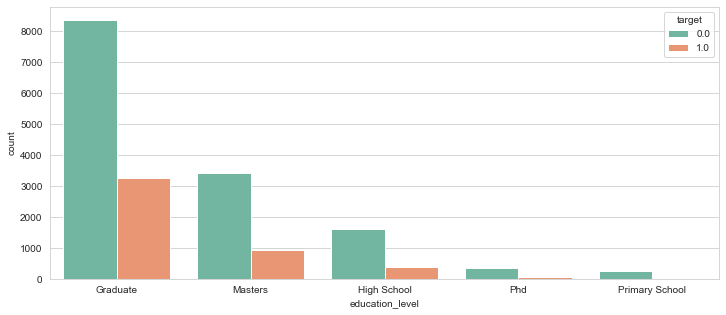

In [18]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'education_level',hue='target',data=data,palette='Set2');

Karena dari dataset diatas kita melihat adanya *NAN* maka kita akan mengisi *NAN*-nya dan akan menghilangkan *Other* karena dapat dilihat dari grafik diatas jika dihilangkan tidak akan berpengaruh banyak pada dataset berikut ini.

In [19]:
data["education_level"].fillna("Graduate", inplace = True)


edu = pd.get_dummies(data['education_level'])
data.drop(['education_level'],axis=1,inplace=True)
data = pd.concat([data,edu],axis=1)


data.drop(['Phd','Primary School'],axis=1,inplace=True) 

Kita dapat simpulkan dari plot diatas bahwa tidak ada satu orang pun yang terjun ke bidang ini tanpa lulus.

### 6. Major Discipline
Fitur ini menyebutkan disiplin utama pendidikan kandidat.

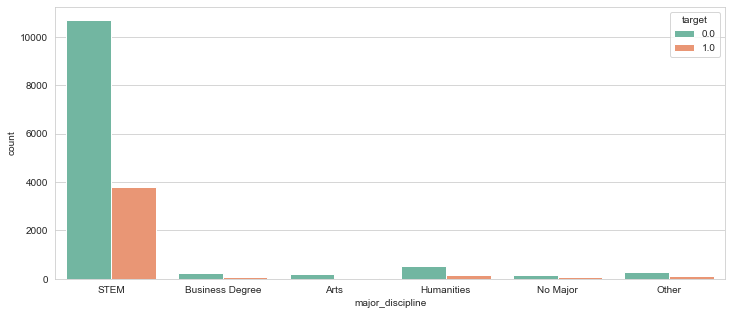

In [20]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'major_discipline',hue='target',data=data,palette='Set2');

Karena dari dataset diatas kita melihat adanya *NAN* maka kita akan mengisi *NAN*-nya dan akan menghilangkan *Other* karena dapat dilihat dari grafik diatas jika dihilangkan tidak akan berpengaruh banyak pada dataset berikut ini.

In [21]:
data["major_discipline"].fillna("STEM", inplace = True)


md = pd.get_dummies(data['major_discipline'])
data.drop(['major_discipline'],axis=1,inplace=True)
data = pd.concat([data,md],axis=1)


data.drop(['Business Degree','Arts','Humanities','No Major','Other'],axis=1,inplace=True) 

Dari beberapa jurusan yang diatas, jurusan yang paling banyak untuk pindah pekerjaan iyalah STEM (Science, Technology, Engineering, and Mathematics) sedangkan paling sedikit yaitu Arts.

### 7. Experience
Fitur ini menyebutkan total pengalaman kandidat selama bertahun-tahun.

In [22]:
data["experience"].fillna("20", inplace = True)

data.replace({"experience":{">20":20,"<1":1}},inplace = True)

data["experience"] = data["experience"].astype("int64")

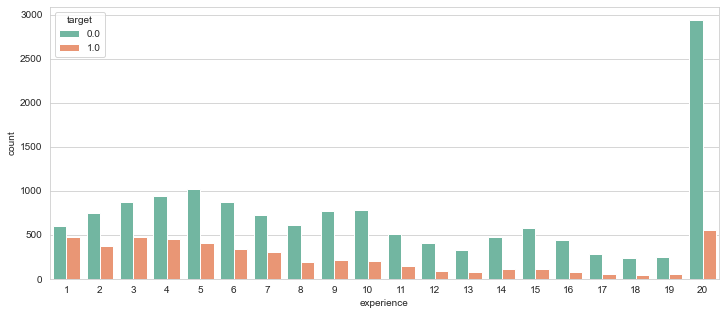

In [23]:
plt.figure(figsize=(12, 5))
sns.countplot(x = 'experience',hue="target",data=data,palette='Set2');

Dari plot diatas bisa kita simpulkan bahwa semakin lama pengalaman di suatu pekerjaan belum tentu menjadi patokan orang untuk berpindah pekerjaan, tetapi setelah seseorang yang memiliki pengalaman selama 20 tahun ia mungkin sangat bosan dengan pekerjaannya makanya wajar saja persentasenya lebih tinggi orang yang ingin mengganti pekerjaannya.

### 8. Training Hours
Fitur ini menyebutkan jam pelatihan yang diselesaikan oleh kandidat.

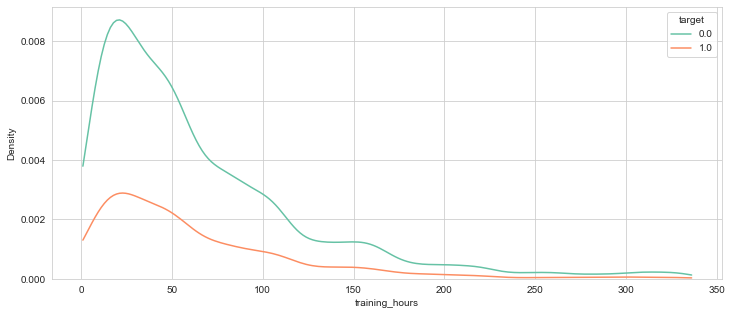

In [24]:
plt.figure(figsize=(12, 5))
sns.kdeplot(data=data, x="training_hours", hue="target",cut = 0,palette='Set2');

Di sini kita dapat melihat bahwa karyawan dengan jam pelatihan yang lebih sedikit memiliki kemungkinan lebih rendah untuk berpindah pekerjaan.

In [25]:
data.head()

,city,city_development_index,experience,company_size,company_type,last_new_job,training_hours,target,Female,Male,Has relevent experience,Full time course,no_enrollment,Graduate,High School,Masters,STEM
0,city_103,0.920,20,NaN,NaN,1,36,1.0,0,1,1,0,1,1,0,0,1
1,city_40,0.776,15,50-99,Pvt Ltd,>4,47,0.0,0,1,0,0,1,1,0,0,1
2,city_21,0.624,5,NaN,NaN,never,83,0.0,0,1,0,1,0,1,0,0,1
3,city_115,0.789,1,NaN,Pvt Ltd,never,52,1.0,0,1,0,0,1,1,0,0,0
4,city_162,0.767,20,50-99,Funded Startup,4,8,0.0,0,1,1,0,1,0,0,1,1


### Training Hours vs Relevent Experience

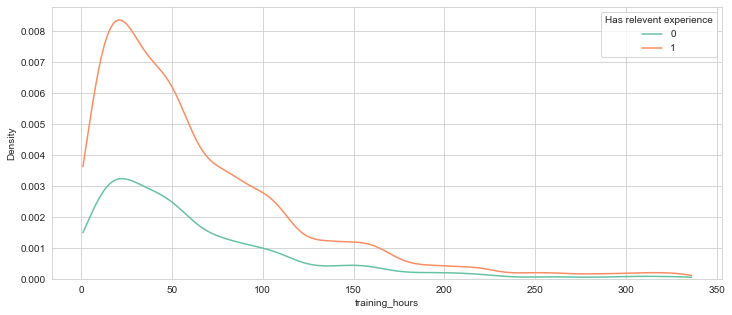

In [26]:
# Training Hours vs Relevent Experience
plt.figure(figsize=(12, 5))
sns.kdeplot(data=data, x="training_hours", hue="Has relevent experience",cut = 0,palette='Set2');

Visualisasi di atas menunjukkan bahwa ada lebih banyak karyawan dengan pengalaman yang relevan dengan jam pelatihan yang lebih rendah.

### Education Level vs Relevent Experience

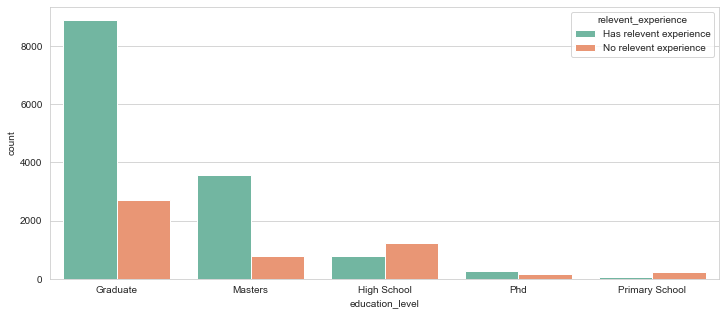

In [27]:
# Education Level vs Relevent Experience
plt.figure(figsize=(12, 5))
sns.countplot(x = 'education_level',hue='relevent_experience',data=df,palette='Set2');

Di sini kita dapat melihat bahwa lulusan memiliki pengalaman yang lebih relevan dibandingkan dengan yang lain.

### Data Pre-processing
Pertama, kita mempersiapkan data dengan fitur-fitur yang sudah dipilih untuk pelatihan model

#### Labelling

Label encoding "city". Beberapa fitur kategorik dalam dataset ini adalah ordinal, yaitu ada urutan kategori yang jelas. Jadi labelling secara manual.

In [30]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['city'] = le.fit_transform(df['city'])
df['city'].head(5)

0     5
1    77
2    64
3    14
4    50
Name: city, dtype: int64

In [28]:
gender = {
    'Female' : 2,
    'Male' : 1,
    'Other' : 0
    }

relevent_experience = {
    'Has relevent experience' : 1,
    'No relevent experience' : 0
    }

enrolled_university = {
    'no_enrollment' : 0,
    'Part time course' : 1,
    'Full time course' : 2
    }

education_level = {
    'Primary School' :    0,
    'Graduate'       :    2,
    'Masters'        :    3, 
    'High School'    :    1, 
    'Phd'            :    4
    } 

major = {
    'STEM' : 0,
    'Business Degree' : 1,
    'Humanities' : 2,
    'Arts' : 3,
    'Other' : 4,
    'No Major' : 5
    }

experience = {
    '<1' : 0,
    '1' : 1,
    '2' : 2,
    '3' : 3,
    '4' : 4,
    '5' : 5,
    '6' : 6,
    '7' : 7,
    '8' : 8,
    '9' : 9,
    '10' : 10,
    '11' : 11,
    '12' : 12,
    '13' : 13,
    '14' : 14,
    '15' : 15,
    '16' : 16,
    '17' : 17,
    '18' : 18,
    '19' : 19,
    '20' : 20,
    '>20' : 21
    }

size = {
    '<10' : 0,
    '10/49' : 1,
    '50-99' : 2,
    '100-500' :3,
    '500-999' :4,
    '1000-4999': 5,
    '5000-9999' : 6,
    '10000+' : 7
    }

company_type = {
    'Pvt Ltd'               :    0,
    'Funded Startup'        :    1, 
    'Early Stage Startup'   :    2, 
    'Other'                 :    3, 
    'Public Sector'         :    4, 
    'NGO'                   :    5
}

last_new_job = {
    'never'        :    0,
    '1'            :    1, 
    '2'            :    2, 
    '3'            :    3, 
    '4'            :    4, 
    '>4'           :    5
}

df.loc[:,'education_level'] = df['education_level'].map(education_level)
df.loc[:,'company_size'] = df['company_size'].map(size)
df.loc[:,'company_type'] = df['company_type'].map(company_type)
df.loc[:,'last_new_job'] = df['last_new_job'].map(last_new_job)
df.loc[:,'major_discipline'] = df['major_discipline'].map(major)
df.loc[:,'enrolled_university'] = df['enrolled_university'].map(enrolled_university)
df.loc[:,'relevent_experience'] = df['relevent_experience'].map(relevent_experience)
df.loc[:,'gender'] = df['gender'].map(gender)
df.loc[:,'experience'] = df['experience'].map(experience)

#### Handling Missing Value

In [31]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer()

# copy data just in case
copy = df.copy()

copy = knn_imputer.fit_transform(copy)

# pembulatan nilai knn
copy[:, 3:] = np.round(copy[:, 3:])
df = pd.DataFrame(copy, columns = df.columns)

##### Normalize the dataset

In [33]:
# Standaridzed data menggunakan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)

d = pd.DataFrame(scaler.transform(df), 
                  index=df.index, columns=df.columns)
d

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.040984,0.942116,0.5,1.0,0.0,0.50,0.0,1.000000,0.571429,0.0,0.2,0.104478,1.0
1,0.631148,0.654691,0.5,0.0,0.0,0.50,0.0,0.714286,0.285714,0.0,1.0,0.137313,0.0
2,0.524590,0.351297,0.5,0.0,1.0,0.50,0.0,0.238095,0.714286,0.0,0.0,0.244776,0.0
3,0.114754,0.680639,0.5,0.0,0.5,0.50,0.2,0.000000,0.428571,0.0,0.0,0.152239,1.0
4,0.409836,0.636727,0.5,1.0,0.0,0.75,0.0,1.000000,0.285714,0.2,0.8,0.020896,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.450820,0.858283,0.5,0.0,0.0,0.50,0.4,0.666667,0.428571,0.2,0.2,0.122388,1.0
19154,0.040984,0.942116,0.5,1.0,0.0,0.50,0.0,0.666667,0.571429,0.4,0.8,0.152239,1.0
19155,0.040984,0.942116,0.5,1.0,0.0,0.50,0.0,1.000000,0.285714,0.0,0.8,0.128358,0.0
19156,0.770492,0.706587,0.5,1.0,0.0,0.25,0.2,0.000000,0.571429,0.0,0.4,0.286567,0.0


##### Select the best Feature

In [41]:
# Untuk memberi informasi tentang top fitur
a = d.loc[:,d.columns!='target']
b = d[['target']]

# SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=5)
selector.fit(a, b)
a_new = selector.transform(a)
print(a.columns[selector.get_support(indices=True)])

Index(['city_development_index', 'relevent_experience', 'enrolled_university',
       'experience', 'last_new_job'],
      dtype='object')


Setelah dilakukan pemilihan fitur dan dipertimbangkan dari kategorikal dan numerikal maka fitur-fitur yang akan dipilih ialah:
- city_development_index
- relevent_experience
- enrolled_university
- experience
- last_new_job

In [44]:
# Buat tabel baru untuk top fitur
df_new = df[['city_development_index', 'relevent_experience', 'enrolled_university',
       'experience', 'last_new_job','target']]
df_new.head()

,city_development_index,relevent_experience,enrolled_university,experience,last_new_job,target
0,0.920,1.0,0.0,21.0,1.0,1.0
1,0.776,0.0,0.0,15.0,5.0,0.0
2,0.624,0.0,2.0,5.0,0.0,0.0
3,0.789,0.0,1.0,0.0,0.0,1.0
4,0.767,1.0,0.0,21.0,4.0,0.0


#### Define X and y

In [45]:
# Mendefinisikan X dan y
X = df_new.drop(columns=['target'])
y = df_new['target']

#### Data Split
Memisahkan dataset menjadi 30% untuk test dan 70% untuk train.

In [46]:
# Mendefinisikan train, test pada X dan y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

print("Total of Training data : ", len(X_train))
print("Total of Testing data : ", len(X_test))

Total of Training data :  13410
Total of Testing data :  5748


#### Scaling Data

In [47]:
# Standaridzed data menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipe = Pipeline([('scaler', StandardScaler())])

In [48]:
X_train = num_pipe.fit_transform(X_train)
X_test = num_pipe.transform(X_test)

### Model Definition
Dalam analisis ini, kami menggunakan beberapa model dalam *Machine Learning* sebagai model untuk melatih dataset, seperti:
1. Logistic Regression
3. Decision Tree
4. Random Forest Classifier
5. K Nearest Neighbour

### Model Training

In [49]:
# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### 1. Logistic Regression

In [50]:
# Define and fit
lr=LogisticRegression()
lr.fit(X_train,y_train)

# Predict
pred_lr=lr.predict(X_test)

# Accuracy Score
score_lr = accuracy_score(y_test, pred_lr)

# Confusion Matrix
lr_conf_matrix = confusion_matrix(y_test, pred_lr)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(y_test,pred_lr))

confusion matrix
[[4009  288]
 [1084  367]]


              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85      4297
         1.0       0.56      0.25      0.35      1451

    accuracy                           0.76      5748
   macro avg       0.67      0.59      0.60      5748
weighted avg       0.73      0.76      0.73      5748



In [51]:
# Cross Validation
cv_lr = cross_val_score(lr, X,y, cv=10)
print("Logistic Regression Accuracy: %0.2f (+/- %0.2f)" % (cv_lr.mean(), cv_lr.std()*2))

Logistic Regression Accuracy: 0.77 (+/- 0.01)


Dari hasil **Logistic Regression** dapat dikatakan bahwa:

Logistic Regression memiliki kemampuan yang cukup untuk mendeteksi **tidak pindah pekerjaan** dengan nilai *Precision* 0.79, nilai *Recall* 0.93 dan nilai F1 0.85

Dan memiliki kemampuan yang tidak baik untuk mendeteksi **pindah pekerjaan** dengan nilai *Precision* 0.56, nilai *Recall* 0.25 dan nilai F1 0.35

Jadi Logistic Regression memiliki akurasi yang cukup baik yaitu 0.76, lalu setelah dilakukannya cross validation di dapat dengan hasil yang sama yaitu 0.77.

### 3. Decision Tree

In [52]:
# Decision Tree
tree = DecisionTreeClassifier( max_depth= 20, criterion= 'gini',random_state=42)
tree.fit(X_train,y_train)

# Predict
pred_tree = tree.predict(X_test)

# Accuracy
score_tree = accuracy_score(y_test,pred_tree)

# Confusion Matrix
tree_conf_matrix = confusion_matrix(y_test, pred_tree)
print("confusion matrix")
print(tree_conf_matrix)
print("\n")
print(classification_report(y_test,pred_tree))

confusion matrix
[[3707  590]
 [ 970  481]]


              precision    recall  f1-score   support

         0.0       0.79      0.86      0.83      4297
         1.0       0.45      0.33      0.38      1451

    accuracy                           0.73      5748
   macro avg       0.62      0.60      0.60      5748
weighted avg       0.71      0.73      0.71      5748



In [53]:
# Cross Validation
cv_tree = cross_val_score(tree, X,y, cv=10)
print("Decision Tree Accuracy: %0.2f (+/- %0.2f)" % (cv_tree.mean(), cv_tree.std()*2))

Decision Tree Accuracy: 0.74 (+/- 0.02)


Dari hasil **Decision Tree** dapat dikatakan bahwa:

Decision Tree memiliki kemampuan yang cukup untuk mendeteksi **tidak pindah pekerjaan** dengan nilai *Precision* 0.79, nilai *Recall* 0.86 dan nilai F1 0.83

Dan memiliki kemampuan yang tidak baik untuk mendeteksi **pindah pekerjaan** dengan nilai *Precision* 0.45, nilai *Recall* 0.33 dan nilai F1 0.48

Jadi Decision Tree memiliki akurasi yang cukup baik yaitu 0.73, lalu setelah dilakukannya cross validation di dapat dengan hasil yang sama yaitu 0.74.

### 4. Random Forest Classifier

In [54]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42,max_leaf_nodes=100,max_depth=5)
rfc.fit(X_train,y_train)

# Predict
pred_rfc = rfc.predict(X_test)

# Accuracy
score_rfc = accuracy_score(y_test,pred_rfc)

# Confusion Matrix
rfc_conf_matrix = confusion_matrix(y_test, pred_rfc)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(y_test,pred_rfc))

confusion matrix
[[3883  414]
 [ 868  583]]


              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      4297
         1.0       0.58      0.40      0.48      1451

    accuracy                           0.78      5748
   macro avg       0.70      0.65      0.67      5748
weighted avg       0.76      0.78      0.76      5748



In [55]:
# Cross Validation
cv_rfc = cross_val_score(rfc, X,y, cv=10)
print("Random Forest Accuracy: %0.2f (+/- %0.2f)" % (cv_rfc.mean(), cv_rfc.std()*2))

Random Forest Accuracy: 0.78 (+/- 0.01)


Dari hasil **Random Forest** dapat dikatakan bahwa:

Random Forest memiliki kemampuan yang cukup untuk mendeteksi **tidak pindah pekerjaan** dengan nilai *Precision* 0.82, nilai *Recall* 0.90 dan nilai F1 0.86 

Dan memiliki kemampuan yang tidak baik untuk mendeteksi **pindah pekerjaan** dengan nilai *Precision* 0.58, nilai *Recall* 0.40 dan nilai F1 0.48

Jadi Random Forest memiliki akurasi yang cukup baik yaitu 0.78, lalu setelah dilakukannya cross validation di dapat dengan hasil yang sama yaitu 0.78.

### 5. KNN

In [56]:
# KNN
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

# Predict
pred_knn = knn.predict(X_test)

# Accuracy
score_knn = accuracy_score(y_test,pred_knn)

# Confusion Matrix
knn_conf_matrix = confusion_matrix(y_test, pred_knn)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print(classification_report(y_test,pred_knn))

confusion matrix
[[3939  358]
 [1070  381]]


              precision    recall  f1-score   support

         0.0       0.79      0.92      0.85      4297
         1.0       0.52      0.26      0.35      1451

    accuracy                           0.75      5748
   macro avg       0.65      0.59      0.60      5748
weighted avg       0.72      0.75      0.72      5748



In [57]:
# Cross Validation
cv_knn = cross_val_score(knn, X,y, cv=10)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (cv_knn.mean(), cv_knn.std()*2))

KNN Accuracy: 0.76 (+/- 0.01)


Dari hasil **KNN** dapat dikatakan bahwa:

KNN memiliki kemampuan yang cukup untuk mendeteksi **tidak pindah pekerjaan** dengan nilai *Precision* 0.79, nilai *Recall* 0.92 dan nilai F1 0.85

Dan memiliki kemampuan yang tidak baik untuk mendeteksi **pindah pekerjaan** dengan nilai *Precision* 0.52, nilai *Recall* 0.26 dan nilai F1 0.35

Jadi KNN memiliki akurasi yang cukup baik yaitu 0.75, lalu setelah dilakukannya cross validation di dapat dengan hasil yang sama yaitu 0.76.

### ROC Curve

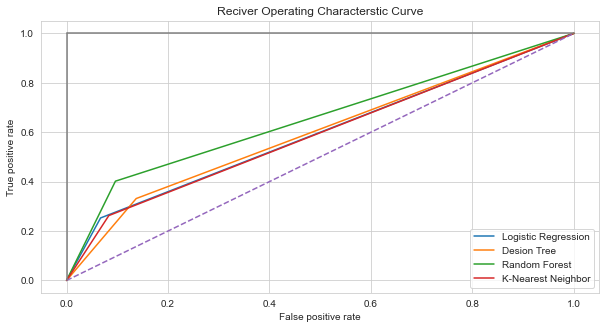

In [58]:
# Saving the confusion matrix result by using the roc_curve function
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred_lr)
fpr2, tpr2, thresholds2 = roc_curve(y_test, pred_tree)
fpr3, tpr3, thresholds3 = roc_curve(y_test, pred_rfc)                                                           
fpr4, tpr4, thresholds4 = roc_curve(y_test, pred_knn)



# Shows the visualization of the ROC Curve from each model
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(fpr1, tpr1,label='Logistic Regression')
plt.plot(fpr2, tpr2,label='Desion Tree')
plt.plot(fpr3, tpr3,label='Random Forest')
plt.plot(fpr4, tpr4,label='K-Nearest Neighbor')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

### Model Accuracy

In [59]:
model = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree','Random Forest',
                                   'K-Nearest Neighbour'], 
                         'Accuracy (%)': [score_lr*100, score_tree*100, score_rfc*100,
                                          score_knn*100
                                         ],
                         'Mean Accuracy(%)': [cv_lr.mean()*100, cv_tree.mean()*100, 
                                              cv_rfc.mean()*100, cv_knn.mean()*100, 
                                              ]
                        })
model

,Model,Accuracy (%),Mean Accuracy(%)
0,Logistic Regression,76.130828,76.547600
1,Decision Tree,72.860125,73.760317
2,Random Forest,77.696590,78.150125
3,K-Nearest Neighbour,75.156576,75.686414


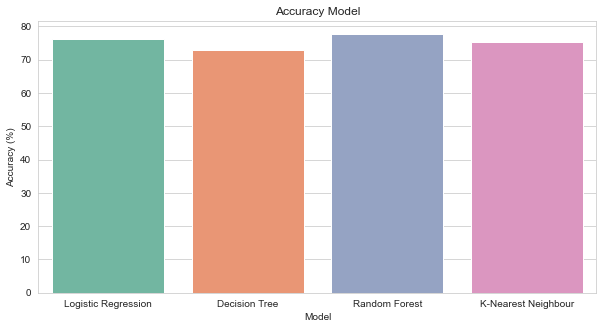

In [61]:
# Showing the Accuracy Model
plt.figure(figsize=(10,5))
plt.title('Accuracy Model')
sns.barplot(data=model, x='Model', y='Accuracy (%)', palette='Set2')
plt.show()

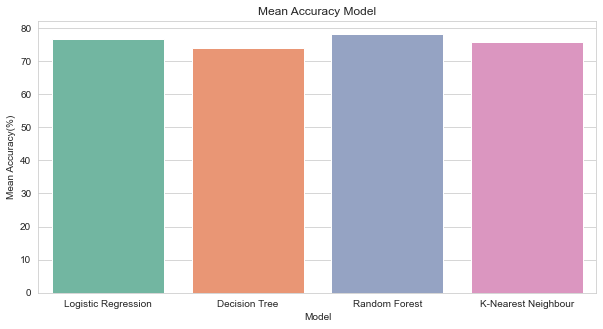

In [62]:
# Showing the Accuracy Model
plt.figure(figsize=(10,5))
plt.title('Mean Accuracy Model')
sns.barplot(data=model, x='Model', y='Mean Accuracy(%)', palette='Set2')
plt.show()

Setelah melakukan model pelatihan dan *cross validation*, kami memutuskan untuk mengambil 1 model terbaik yaitu **Random Forest** yang selanjutnya akan dicari parameter terbaiknya dan akan dilatih kembali.

### Hyperparameter Tuning with GridSearchCV

In [63]:
params2 = [{
    'criterion':("gini", "entropy"),
    'n_estimators':[100, 150, 200],  
    'max_leaf_nodes':[100, 120, 150],
    'max_depth':[10,20]},

    {'bootstrap':[False], 
     'n_estimators':[100, 200]}]

rf_gs = GridSearchCV(rfc, params2, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, return_train_score=True)
rf_gs.fit(X_train, y_train)

Fitting 3 folds for each of 38 candidates, totalling 114 fits


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=5, max_leaf_nodes=100,
                                              random_state=42),
             n_jobs=-1,
             param_grid=[{'criterion': ('gini', 'entropy'),
                          'max_depth': [10, 20],
                          'max_leaf_nodes': [100, 120, 150],
                          'n_estimators': [100, 150, 200]},
                         {'bootstrap': [False], 'n_estimators': [100, 200]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [64]:
best_params_rf = rf_gs.best_params_
print(f"Best parameters: {best_params_rf}")

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 120, 'n_estimators': 100}


In [65]:
# Random Forest with hyperparameters
rf1 = RandomForestClassifier(**best_params_rf)
rf1.fit(X_train, y_train)

# Predict
pred_rf1 = rf1.predict(X_test)

# Accuracy
score_rf1 = accuracy_score(y_test,pred_rf1)

# Confusion Matrix
rf1_conf_matrix = confusion_matrix(y_test, pred_rf1)
print("confusion matrix")
print(rf1_conf_matrix)
print("\n")
print(classification_report(y_test,pred_rf1))

confusion matrix
[[3882  415]
 [ 867  584]]


              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      4297
         1.0       0.58      0.40      0.48      1451

    accuracy                           0.78      5748
   macro avg       0.70      0.65      0.67      5748
weighted avg       0.76      0.78      0.76      5748



Setelah melakukan tunning menggunakan GridSearch CV saya tidak melihat adanya perbedaan.

### Model Inference
Setelah melakukan pengevaluasian didapatkan hasil bahwa *Random Forest* adalah model yang terbaik dengan akurasi 78% dan kita akan mencoba menguji dengan parameter terbaik

In [67]:
new = df_new.sample(n=3, random_state=42)
new.drop(['target'], axis=1, inplace=True)
new

,city_development_index,relevent_experience,enrolled_university,experience,last_new_job
16144,0.910,1.0,0.0,6.0,1.0
13661,0.920,1.0,0.0,21.0,2.0
344,0.924,1.0,0.0,9.0,1.0


In [68]:
# Predict
predict = rf1.predict(new)

print("Hasil Klasifikasi model Random Forest : \n")
print('Target {}'.format(predict))

Hasil Klasifikasi model Random Forest : 

Target [0. 0. 0.]


### Kesimpulan

- Lebih banyak karyawan dengan pengalaman yang relevan dengan jam pelatihan yang lebih rendah.
- lulusan memiliki pengalaman yang lebih relevan dibandingkan dengan yang lain.
- Setelah melakukan model pelatihan dan *cross validation*, kami memutuskan untuk mengambil 1 model terbaik yaitu **Random Forest** yang selanjutnya akan dicari parameter terbaiknya dan akan dilatih kembali.
- Setelah melakukan pengevaluasian didapatkan hasil bahwa *Random Forest* adalah model yang terbaik dengan akurasi 78% dan kita akan mencoba menguji dengan parameter terbaik